# Test Sub Functions

In [1]:

include("HighBifLib.jl")
using Distributions, StatsBase, HighBifLib, Plots



## test KL divergence

In [2]:
# test KL divergence
# test 1 Normal Dist  w/ 
d1 = Normal(0, 2);   # mean = 0.5Hz, std = 0.5Hz
d2 = Normal(0, 1);
samples = rand(d1, 1000);


In [3]:
println(empirical_1D_KL_divergence(samples, d2, 20))
println(empirical_1D_KL_divergence(samples, d2, 40))
println(empirical_1D_KL_divergence(samples, d2, 60))
println(empirical_1D_KL_divergence(samples, d2, 80))
println("-------------")
println(empirical_1D_KL_divergence(samples, d2, 0, 1))

0.8983816020182923
1.7527171060638609
4.3803224649654915
4.3803224649654915
-------------
0.43845903807436204


In [7]:
N_samp = 100
kl_div_pc = zeros(N_samp)
kl_div_hist = zeros(N_samp)
for i_samp=1:N_samp
    samples = rand(d1, 10000)
    #kl_div_hist[i_samp] = empirical_1D_KL_divergence(samples, )
    kl_div_pc[i_samp] = empirical_1D_KL_divergence(samples, 0, 1)
end 

In [5]:
kl_div_pc

100-element Array{Float64,1}:
 0.565227
 0.480035
 0.405257
 0.330426
 0.353875
 0.360191
 0.405329
 0.265608
 0.336465
 0.347975
 0.492383
 0.43999 
 0.512847
 ⋮       
 0.372193
 0.380809
 0.282222
 0.408185
 0.460292
 0.431424
 0.335261
 0.469202
 0.283533
 0.471484
 0.450018
 0.39233 

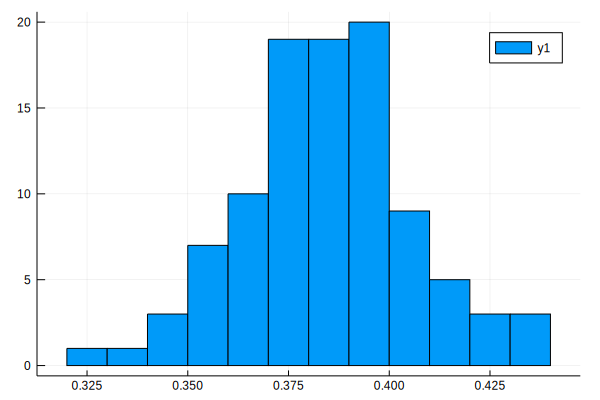

In [8]:
histogram(kl_div_pc)

## Analytic KL divergence for Gaussians

As a comparision we can calculate the true value analytically, one can show that the KL divergence for two Gaussians is:

$KL(N_1(\mu_1,\sigma_1),N_2(\mu_2,\sigma_2))=\log\frac{\sigma_1}{\sigma_2} + \frac{\sigma_1^2 + (\mu_1 - \mu_2)^2}{2\sigma_2^2} - \frac{1}{2}$

$KL(N_1(0,1),N(1,2)) = \log2 + \frac{1+1}{2\cdot4} - \frac{1}{2}$

$KL(N_1(0,1),N(1,2)) = \log2 - \frac{1}{4} \approx 0.44$

# Test KL Div for some extreme Cases

first plot ECDFs

In [10]:
a = 0.737705
b = 0.590164
tV = zeros(20)
for i=1:20
    if (i%2)==0
        tV[i] = a
    else
        tV[i] = b
    end 
end 
    
m,v = mean_and_var(tV)
dist = Normal(m,sqrt(v))
kl = empirical_1D_KL_divergence(tV, m, v)

41.77720523241091

In [11]:
x=collect(0.4:0.01:0.8)
mu = m 
sig = sqrt(v)
normal_cdf(x::Real) = 0.5*(1+erf((x-mu)/sqrt(2*sig*sig)))

N_x = length(x)
y_1 = zeros(N_x)
y_2 = zeros(N_x)
y_3 = zeros(N_x)
ecdf_n = ecdf_pc(sort(rand(dist,2000)))
ecdf_t = ecdf_pc(sort(tV))
for i=1:N_x
    y_1[i] = ecdf_n[x[i]]
    y_2[i] = ecdf_t[x[i]]
    y_3[i] = normal_cdf(x[i])
end


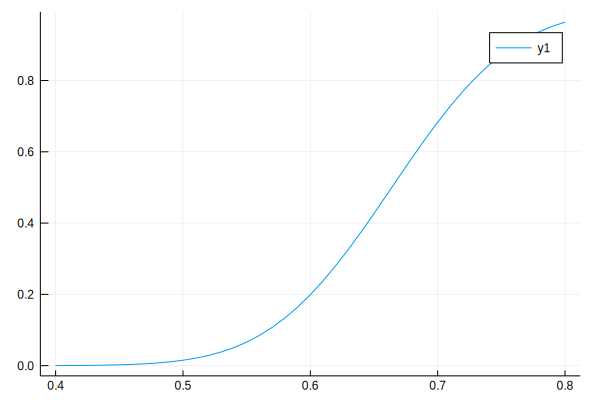

In [12]:
using Plots
plot(x,y_3)

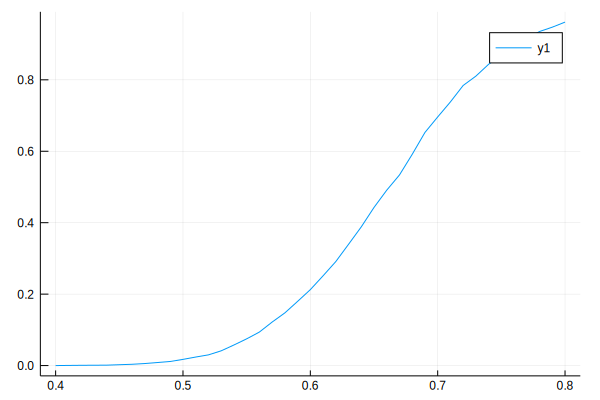

In [13]:
using Plots
plot(x,y_1)

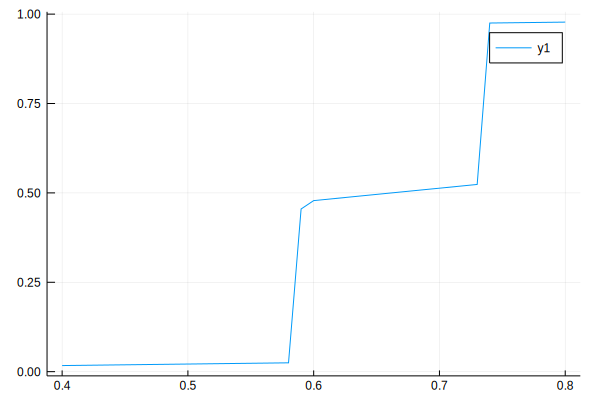

In [14]:
plot(x,y_2)

## test curve entropy

* Test 1: a line
* Test 2: a circle
* Test 3: a modulated circle


In [188]:
ndim = 3
t = reshape(collect(linspace(0,10,100)),(1,100));

In [189]:
# test 1: line
p = rand(ndim)
p = reshape(p,(ndim,1))
Y = (p*t)' # x0 = 0
Yt = [Y[i, :] for i in 1:size(Y, 1)]; # convert to Array of Arrays like DiffEq Solutions

In [7]:
curve_entropy(Yt)

0.6931471805599455

In [ ]:
using Plots

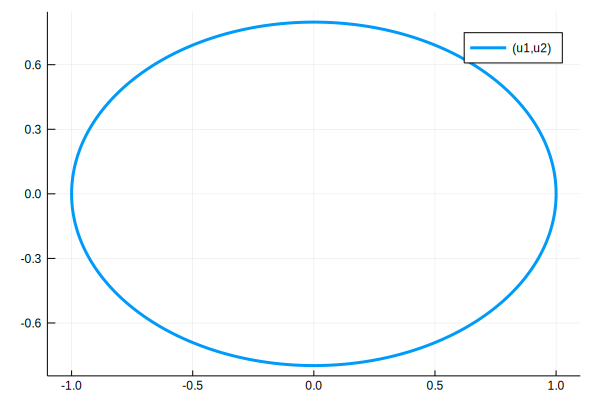

In [171]:
# setup circle ODE problem
using DifferentialEquations
function circle(du, u, p, t)
    du[1] = -1.*p[1]*u[2] - p[3]*u[4]
    du[2] = u[1] + p[3]*u[3]
    du[3] = -1.*p[2]*u[4]
    du[4] = p[2]*u[3]
end

pars = [0.5*pi,6*pi,0]
tspan = (0.,3*pi)
prob = ODEProblem(circle, [1.,0,0.2,0], tspan, pars)

sol = solve(prob)
plot(sol,vars=(1,2))

In [172]:
curve_entropy(sol.u)

3.567884554608746

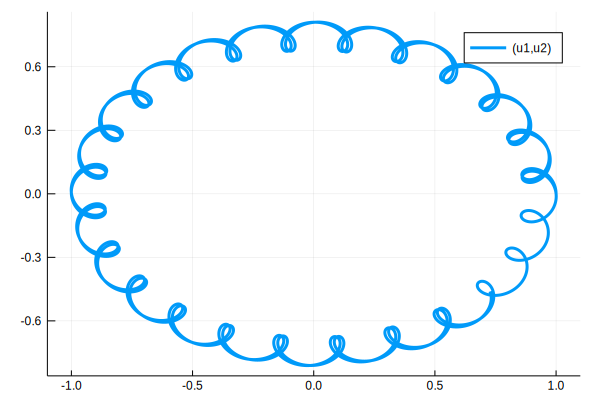

In [181]:
pars = [0.5*pi,10*pi,10]

prob = ODEProblem(circle, [1.,0,0.2,0], tspan, pars)

sol2 = solve(prob)
plot(sol2,vars=(1,2))

In [182]:
curve_entropy(sol2.u)

4.101829719095501

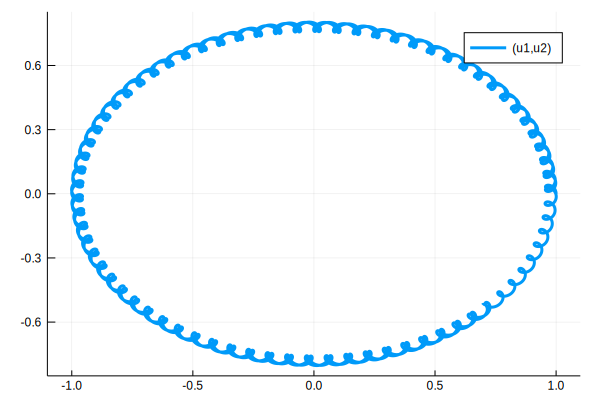

In [185]:
pars = [0.5*pi,30*pi,10]

prob = ODEProblem(circle, [1.,0,0.2,0], tspan, pars)

sol3 = solve(prob)
plot(sol3,vars=(1,2))

In [186]:
curve_entropy(sol3.u)

5.1613916121153185

In [1]:
a =[1, 2, 6]

3-element Array{Int64,1}:
 1
 2
 6